# notes
- this notebook plots the correlation func of sigma, e1,e2 as function of separation
- same heights.
- pkl dir: heightPsfws, heightRand

In [1]:
import psfws
import pickle
import numpy as np
import treecorr
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import treecorr
import pandas as pd
import galsim

In [2]:
def corr2d(thx,thy,para):
    cat = treecorr.Catalog(x=thx, y=thy, k=para, x_units='degree', y_units='degree')
    kk = treecorr.KKCorrelation(min_sep=0, max_sep=0.5,bin_type="TwoD", nbins=20, sep_units='degree')
    kk.process(cat)
    xi = kk.xi
    return xi

def corr1d(thx,thy,para):
    cat = treecorr.Catalog(x=thx, y=thy, k=para, x_units='degree', y_units='degree')
    kk = treecorr.KKCorrelation(min_sep=0.001, max_sep=1, bin_type="Log",nbins=20, sep_units='degree')
    kk.process(cat)
    xi = kk.xi
    r = kk.rnom
    return xi, r

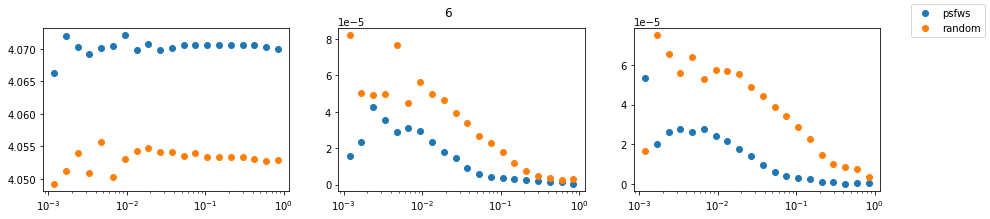

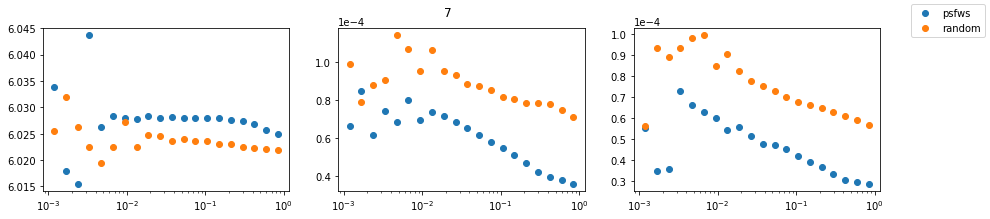

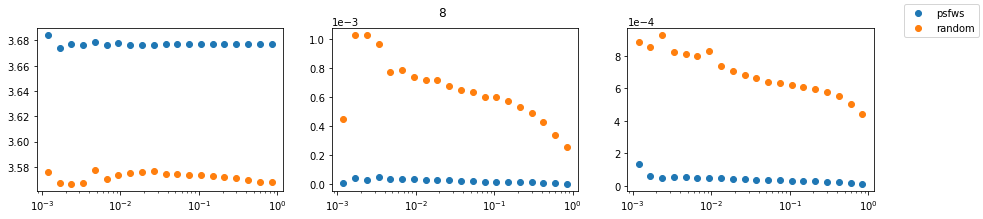

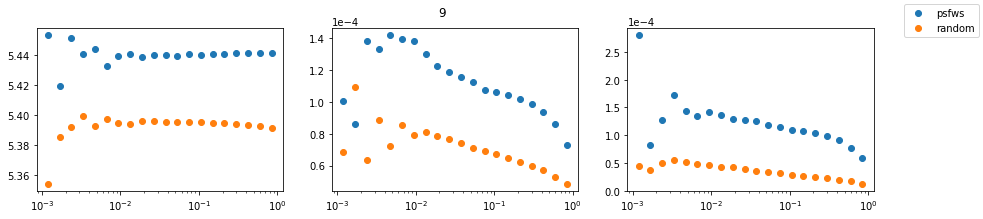

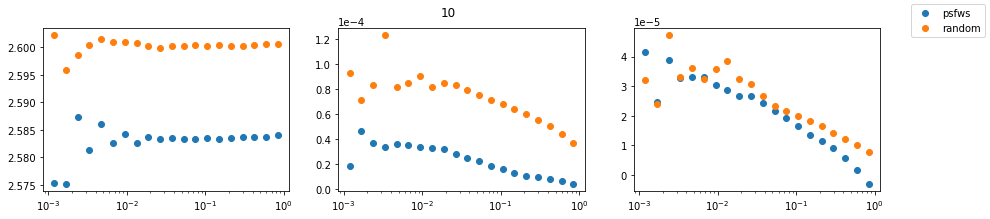

In [145]:
meansP={}
meansR={}
inputs={}

for i in ([6, 7, 8, 9,10, 22, 23, 25, 26, 27]+list(range(30,41))):
    data = pickle.load(open("heightPsfws/outh_psfws_"+str(i)+".pkl", 'rb'))
    for key in data.keys():
        data[key] = np.array(data[key])
    (thx, thy, seed, x, y, sigma, e1, e2, arguments, atmSummary, atmKwargs) = tuple(data.values())

    corrs,xs = corr1d(thx,thy,sigma)
    corre1,xs = corr1d(thx,thy,e1)
    corre2,xs = corr1d(thx,thy,e2)

    data = pickle.load(open("heightRand/outh_rand_"+str(i)+".pkl", 'rb'))
    for key in data.keys():
        data[key] = np.array(data[key])
    (thx1, thy1, seed, x, y, sigma1, e1, e2, arguments, atmSummary, atmKwargs) = tuple(data.values())

    corrsR,xsR = corr1d(thx1,thy1,sigma1)
    corre1R,xsR = corr1d(thx1,thy1,e1)
    corre2R,xsR = corr1d(thx1,thy1,e2)
    
    fig, ax = plt.subplots(1,3,figsize=(15,3))
    
    ax[0].scatter(xs,corrs,label="psfws")
    ax[0].scatter(xsR,corrsR, label="random")
    
    ax[1].scatter(xs,corre1)
    ax[1].scatter(xsR,corre1R)
    
    ax[2].scatter(xs,corre2)
    ax[2].scatter(xsR,corre2R)
    
    
    [a.ticklabel_format(style="sci", scilimits=(0,0)) for a in ax]
    [a.set_xscale('log') for a in ax]
    
    #[a.set_yscale('log') for a in ax]
    #[a.set_ylim(ymin=0) for a in ax]

    fig.suptitle(str(i))
    fig.legend()
    
    meansP[i] = [np.mean(corrs), np.mean(corre1), np.mean(corre2)]
    meansR[i] = [np.mean(corrsR), np.mean(corre1R), np.mean(corre2R)]
    
    
    if i not in list(range(6,11)):
        plt.close()
    

# getting some statistics

In [36]:
# psfws corr
p = pd.DataFrame(meansP, index=["sigma", "e1", "e2"]).T
# random corr
r = pd.DataFrame(meansR, index=["sigma", "e1", "e2"]).T
print("percent of psfws correlation greater than random correlation")
(p > r).sum(axis=0)/(p > r).shape[0]

percent of psfws correlation greater than random correlation


sigma    0.619048
e1       0.380952
e2       0.428571
dtype: float64

# checking input params

In [87]:
airmass = {}
groundh = {}
screensize = {}
maxspd = {}

airmassR = {}
groundhR = {}
screensizeR = {}
maxspdR = {}

for i in ([6, 7, 8, 9,10, 22, 23, 25, 26, 27]+list(range(30,41))):
    data = pickle.load(open("heightPsfws/outh_psfws_"+str(i)+".pkl", 'rb'))
    (thx, thy, seed, x, y, sigma, e1, e2, arguments, atmSummary, atmKwargs) = tuple(data.values())
    
    airmass[i] = atmSummary['airmass']
    groundh[i] = atmKwargs['altitude'][0]
    screensize[i] = np.ceil(atmKwargs['screen_size'])
    maxspd[i] = np.ceil(np.max(atmKwargs["speed"]))
    
    data = pickle.load(open("heightRand/outh_rand_"+str(i)+".pkl", 'rb'))
    (thx, thy, seed, x, y, sigma, e1, e2, arguments, atmSummary, atmKwargs) = tuple(data.values())

    airmassR[i] = atmSummary['airmass']
    groundhR[i] = atmKwargs['altitude'][0]
    screensizeR[i] = np.ceil(atmKwargs['screen_size'])
    maxspdR[i] = np.ceil(np.max(atmKwargs["speed"]))

In [144]:
print("airmass: ", airmass[6])
print("ground height: ", groundh[6])
df = pd.DataFrame(index=[6, 7, 8, 9,10, 22, 23, 25, 26, 27]+list(range(30,41)))
df ["airmass=1"] = np.array(list(airmass.values()))==np.array(list(airmassR.values()))
df ["h0=0.2"] = np.array(list(groundh.values()))== np.array(list(groundhR.values()))
df ["vmax psfws"] = maxspd.values()
df ["vmax rand"] = maxspdR.values()
df


airmass:  1
ground height:  0.2


,airmass=1,h0=0.2,vmax psfws,vmax rand
6,True,True,32.0,18.0
7,True,True,25.0,19.0
8,True,True,27.0,13.0
9,True,True,29.0,17.0
10,True,True,67.0,20.0
22,True,True,59.0,15.0
23,True,True,51.0,15.0
25,True,True,31.0,20.0
26,True,True,23.0,19.0
27,True,True,24.0,13.0
